El análisis debe abordar los siguientes aspectos:
- Planteo de al menos tres preguntas a ser respondidas mediante análisis de datos.
- Se pueden usar como ejemplo las preguntas sugeridas, o proponer otras.
- Exploración y comprensión de los datos:
- Cargar el dataset proporcionado y realizar un análisis exploratorio de los datos.
- Describir las características principales del dataset, incluyendo el número de observaciones, número de variables y tipos de datos.
- Identificar patrones generales, distribuciones y cualquier anomalía inicial en los datos.
- Visualizar las variables más importantes para entender sus relaciones y distribuciones.
- Aplicación de técnicas de visualización:
- Utilizar técnicas de visualización adecuadas para ilustrar las principales características del dataset.
- Asegurarse de que las visualizaciones sean claras, concisas y efectivas para comunicar la información.
- Interpretar los resultados obtenidos a partir de las visualizaciones.
- Limpieza del dataset:
- Identificar y tratar los valores faltantes en el dataset.
- Detectar y manejar los outliers utilizando técnicas estadísticas o visuales apropiadas.

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
import ast
import missingno as msno
import statsmodels.api as sm

In [239]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

## Carga y Transformación de Datos

Importamos el dataset

In [240]:
# Usar doble barra invertida \\ o una barra normal / en la ruta
#ruta = "/mnt/c/Users/v-tkoller/Documents/Especializacion_IA_UBA/2do_Bimestre_2025/Analisis de Datos/Trabajo Práctico/listings.csv"
ruta = 'listings.csv'

# Cargar el archivo CSV
df = pd.read_csv(ruta)

# Ver las primeras filas
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,https://www.airbnb.com/rooms/11508,20250129142212,2025-01-30,city scrape,Amazing Luxurious Apt-Palermo Soho,LUXURIOUS 1 BDRM APT- POOL/ GYM/ 24-HR SECURIT...,AREA: PALERMO SOHO<br /><br />Minutes walking ...,https://a0.muscache.com/pictures/19357696/b1de...,42762,https://www.airbnb.com/users/show/42762,Candela,2009-10-01,"New York, NY",-,within an hour,100%,79%,t,https://a0.muscache.com/im/users/42762/profile...,https://a0.muscache.com/im/users/42762/profile...,Palermo,1.0,2.0,"['email', 'phone']",t,t,"Buenos Aires, Capital Federal, Argentina",Palermo,NaN,-34.581840,-58.424150,Entire condo,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Bathtub"", ""Air conditioning"", ""Bed linens"", ...","$67,518.00",3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,4,4,25,300,2025-01-30,44,5,1,271,4,30,2025540.0,2012-07-02,2025-01-26,4.82,4.93,4.88,4.93,4.98,4.93,4.86,NaN,f,1,1,0,0,0.29
1,14222,https://www.airbnb.com/rooms/14222,20250129142212,2025-01-30,city scrape,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",Beautiful cozy apartment in excellent location...,Palermo is such a perfect place to explore the...,https://a0.muscache.com/pictures/4695637/bbae8...,87710233,https://www.airbnb.com/users/show/87710233,María,2016-08-03,"Buenos Aires, Argentina","Soy Organizadora de Eventos, me gusta relacion...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/dc9d9...,https://a0.muscache.com/im/pictures/user/dc9d9...,NaN,7.0,16.0,"['email', 'phone']",t,t,"Palermo/Buenos Aires, Autonomous City of Bueno...",Palermo,NaN,-34.586170,-58.410360,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Bathtub"", ""Air conditioning"", ""TV"", ""Heating...","$22,375.00",7,40,7,7,1125,1125,7.0,1125.0,NaN,t,13,43,44,44,2025-01-30,123,8,1,44,8,112,2506000.0,2012-07-10,2025-01-18,4.77,4.76,4.77,4.82,4.90,4.87,4.75,NaN,f,6,6,0,0,0.80
2,15074,https://www.airbnb.com/rooms/15074,20250129142212,2025-01-30,previous scrape,ROOM WITH RIVER SIGHT,NaN,NaN,https://a0.muscache.com/pictures/91166/c0fdcb4...,59338,https://www.airbnb.com/users/show/59338,Monica,2009-12-02,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,NaN,2.0,2.0,[],f,f,NaN,Nuñez,NaN,-34.538920,-58.465990,Private room in rental unit,Private room,1,NaN,1 bath,NaN,NaN,"[""Washer"", ""Air conditioning"", ""Dryer"", ""TV wi...",NaN,29,730,29,29,730,730,29.0,730.0,NaN,NaN,0,0,0,0,2025-01-30,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,16695,https://www.airbnb.com/rooms/16695,20250129142212,2025-01-30,city scrape,DUPLE

Observamos las columnas y el tipo de datos de cada una

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35172 entries, 0 to 35171
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            35172 non-null  int64  
 1   listing_url                                   35172 non-null  object 
 2   scrape_id                                     35172 non-null  int64  
 3   last_scraped                                  35172 non-null  object 
 4   source                                        35172 non-null  object 
 5   name                                          35172 non-null  object 
 6   description                                   34299 non-null  object 
 7   neighborhood_overview                         16588 non-null  object 
 8   picture_url                                   35171 non-null  object 
 9   host_id                                       35172 non-null 

Observamos la cantidad de filas y columnas que tiene el dataset

In [242]:
df.shape

(35172, 79)

In [243]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.517200e+04,3.517200e+04,3.517200e+04,35166.000000,35166.000000,0.0,35172.000000,35172.000000,35172.000000,31602.000000,34445.000000,31604.000000,35172.000000,35172.000000,35172.000000,35172.000000,35172.000000,35172.000000,35172.000000,35172.000000,0.0,35172.000000,35172.000000,35172.000000,35172.000000,35172.000000,35172.000000,35172.000000,35172.000000,35172.000000,35172.000000,3.159800e+04,29412.000000,29411.000000,29412.000000,29412.000000,29412.000000,29412.000000,29411.000000,35172.000000,35172.000000,35172.000000,35172.000000,29412.000000
mean,7.117880e+17,2.025013e+13,2.143294e+08,19.539641,29.425553,NaN,-34.591554,-58.417289,2.943535,1.236504,1.193671,1.908619,6.159871,414.128085,5.611992,6.339702,603.813516,619.608922,6.024659,611.198772,NaN,14.705817,33.255885,54.587683,206.609320,28.027579,9.500625,0.710537,194.856363,9.590043,61.429376,3.491273e+06,4.781097,4.810235,4.741915,4.865169,4.859413,4.870813,4.748523,15.646878,15.048277,0.526242,0.041766,1.325920
std,4.840974e+17,0.000000e+00,2.027420e+08,41.289336,79.583662,NaN,0.018257,0.030169,1.550894,0.656996,0.942565,1.595965,26.072002,651.012551,23.443243,26.050569,446.399557,444.661877,23.987146,443.066755,NaN,12.028228,22.776670,32.941985,126.189102,45.151666,13.991379,1.346065,116.441897,14.185221,76.007351,1.406743e+07,0.361531,0.347766,0.382239,0.307035,0.321622,0.263315,0.374513,34.108688,34.083499,2.653005,0.644463,1.336446
min,1.150800e+04,2.025013e+13,1.342600e+04,1.000000,1.000000,NaN,-34.693700,-58.530890,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,4.719776e+07,2.025013e+13,3.070016e+07,1.000000,1.000000,NaN,-34.602670,-58.437050,2.000000,1.000000,1.000000,1.000000,1.000000,90.000000,1.000000,2.000000,360.000000,365.000000,1.900000,365.000000,NaN,0.000000,10.000000,28.000000,88.000000,2.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.134240e+05,4.730000,4.770000,4.670000,4.850000,4.840000,4.840000,4.680000,1.000000,1.000000,0.000000,0.000000,0.360000
50%,8.875662e+17,2.025013e+13,1.421004e+08,3.000000,4.000000,NaN,-34.590890,-58.418914,2.000000,1.000000,1.000000,1.000000,2.000000,365.000000,2.000000,3.000000,365.000000,365.000000,2.100000,365.000000,NaN,15.000000,37.000000,63.000000,231.000000,11.000000,4.000000,0.000000,221.000000,4.000000,30.000000,1.323294e+06,4.880000,4.900000,4.840000,4.950000,4.960000,4.940000,4.840000,2.000000,2.000000,0.000000,0.000000,0.930000
75%,1.095206e+18,2.025013e+13,4.298024e+08,16.000000,20.000000,NaN,-34.581047,-58.392114,4.000000,1.000000,1.000000,2.000000,4.000000,365.000000,3.000000,4.000000,1125.000000,1125.000000,4.000000,1125.000000,NaN,28.000000,57.000000,86.000000,333.000000,36.000000,13.000000,1.000000,306.000000,13.000000,96.000000,4.310064e+06,5.000000,5.000000,4.980000,5.000000,5.000000,5.000000,4.960000,12.000000,11.000000,0.000000,

Realizamos modificaciones sobre diferentes campos para que su tipo de dato sea de la forma que necesitamos para analizar

In [244]:
# Modificamos la columna precio para que se represente como un flotante
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Modificamos las columnas host_response_rate y host_response_rate para que se represente como un flotante
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float) / 100
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float) / 100

# Modificamos el tipo de dato de los campos que poseen fechas
dates_cols=["first_review","last_review"]
for col in dates_cols:
    df[col]=pd.to_datetime(df[col])
df[["first_review","last_review"]].dtypes

first_review    datetime64[ns]
last_review     datetime64[ns]
dtype: object

In [245]:
# Modificamos las columnas que indican True y False con t y f por 1 y 0
bool_columns = ['host_is_superhost','host_identity_verified','has_availability','instant_bookable','host_has_profile_pic']
for column in bool_columns:
    df[column] = df[column].map({'t': 1, 'f': 0}).astype('Int64')


- Se realiza primero un vistazo general de las columnas del dataset y se eliminan las que no son de nuestro interes
- Las columnas 'name','description','host_about','host_name','neighborhood_overview' tienen como contenido strings que pueden ser de utilidad si se realiza un   trabajo de NLP, el cual creemos que no es para esta materia
- neighbourhood se elimina ya que neighbourhood_cleansed tiene la misma informacion pero mas limpia
- Eliminamos columnas que tienen ids internos o urls que no son utiles para el analisis

In [246]:
df=df.drop(['listing_url','scrape_id','last_scraped', 'picture_url', 'host_url','host_thumbnail_url', 'host_picture_url', 'bathrooms_text',
'calendar_last_scraped','source','neighbourhood','name','description','host_about','host_name','neighborhood_overview','host_location'],axis=1)

In [247]:
n_filas=df.shape[0]
n_columnas=df.shape[1]

Obtenemos la cantidad de nulos que hay por columna y que porcentaje representan sobre el total

In [248]:
missing_data = df.isnull().sum().to_frame(name='nulos')
missing_data['porcentaje'] = 100 * missing_data['nulos'] / len(df)
missing_data = missing_data[missing_data['nulos'] > 0].sort_values(by='porcentaje', ascending=False)
missing_data

,nulos,porcentaje
neighbourhood_group_cleansed,35172,100.000000
calendar_updated,35172,100.000000
license,34782,98.891163
host_neighbourhood,13451,38.243489
review_scores_value,5761,16.379506
review_scores_accuracy,5761,16.379506
first_review,5760,16.376663
last_review,5760,16.376663
review_scores_rating,5760,16.376663
review_scores_cleanliness,5760,16.376663


Se deciden eliminar las columnas 'neighbourhood_group_cleansed', 'calendar_updated' y'license' ya que posen mas del 90% de sus valores nulos, las cuales no generan una clara utilidad para un análisis o implementación de modelo.

In [249]:
df=df.drop(['neighbourhood_group_cleansed', 'calendar_updated','license'],axis=1)

Revisamos si existen datos duplicados en el dataset

In [250]:
print("Cantidad de datos duplicados:", df.duplicated().sum())

Cantidad de datos duplicados: 0


## Análisis Exploratorio

Graficamos historgramas de distribución en variables numéricas (accomodates, price y score_rating) y obtenemos media, varianza y desviación estándar de cada una. 

In [251]:
# Función para graficar
def plot_histograma(data, column, figsize=(6, 3), bins=15, kde=True, mvd=True, snk=False):
    skewness = (data[column].dropna()).skew()
    kurtosis = (data[column].dropna()).kurt()
    media = (data[column].dropna()).mean()
    var = (data[column].dropna()).var()
    std = (data[column].dropna()).std()
    plt.figure(figsize=figsize)
    plt.grid(axis='y')
    sns.histplot(data[column].dropna(), bins=bins, kde=kde)
    if snk:
        plt.figtext(0.7, 0.8, f'Asimetría: {skewness:.2f}', fontsize=10, color='blue')
        plt.figtext(0.715, 0.73, f'Curtosis: {kurtosis:.2f}', fontsize=10, color='blue')
    plt.axvline(media, color='red', linestyle='--', label='Media')
    if mvd:
        plt.figtext(0.15, 0.8, f'Media: {media:.2f}', fontsize=10, color='red')
        plt.figtext(0.15, 0.73, f'Var: {var:.2f}', fontsize=10, color='red')
        plt.figtext(0.15, 0.66, f'Std: {std:.2f}', fontsize=10, color='red')
    plt.title(f'Variable: {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Frecuencia')
    plt.show()
    
    return

### Distribucion de precios

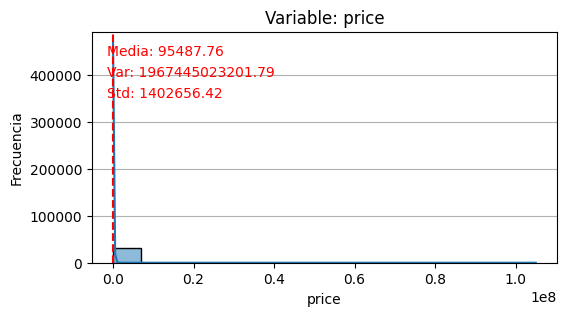

In [252]:
plot_histograma(df, 'price')

Vemos un sesgo a la derecha muy grande en el caso de price. Esto se puede deber a outliers muy altos, para probar esto excluimos los valores que estan por encima del percentil 95

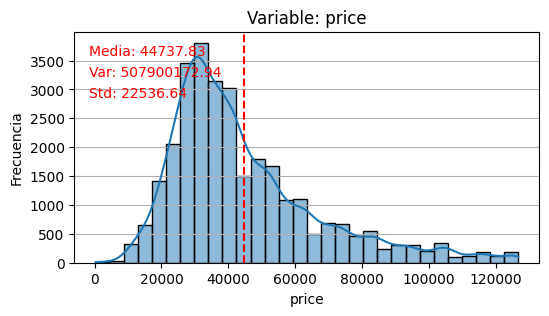

In [253]:
percentil_95 = df['price'].quantile(0.95)

# Filtrar el DataFrame
df_filtrado = df[df['price'] <= percentil_95]

# Graficar histograma con los datos filtrados
plot_histograma(df_filtrado, 'price', bins=30)

Ahora se puede observar de mejor manera la distrucion de precios

### Ratings (valoracion de los hospedajes en las reviews)

Para las valoraciones tenemos diferentes campos que hacen referencia a los diferentes aspectos del hospedaje sobre los que el huesped puede evaluar:
* review_score_rating: calificacion general
* review_scores_accuracy: evalua si la descripcion del alojamiento coincide con la realidad
* review_scores_cleanliness: evalua la limpieza
* review_scores_checkin: evalua las facilidades ofrecidas para realizar el checkin
* review_scores_communication: evalua la comunicacion con el host
* review_score_location: evalua la ubicacion del alojamiento
* review_scores_value: evalua si el huesped sintio que lo que pago valio la pena con respecto a lo recibido

Creamos una columna nueva llamada rating que va a tener un promedio de todas estas evaluaciones dadas por el huesped

In [254]:
df['rating'] = df[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']].mean(axis=1)

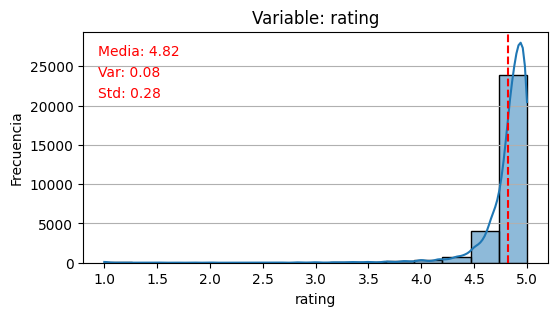

In [255]:
plot_histograma(df, 'rating')

Podemos observar que la mayoria de las evaluaciones suelen ser muy positivas. Para obtener una mejor visualizacion, en este caso vamos a quedarnos con los que sean mayores al percentil 0.05

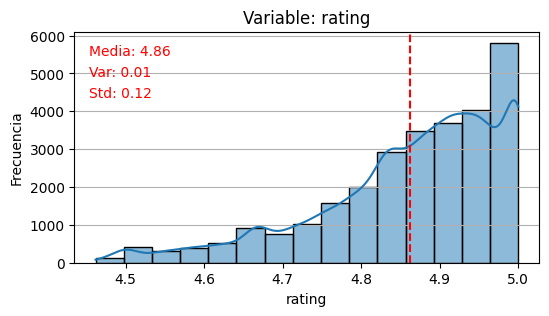

In [256]:
percentil_05 = df['rating'].quantile(0.05)
df_filtrado = df[df['rating'] >= percentil_05]
plot_histograma(df_filtrado, 'rating')

Ahora tenemos una mejor visualizacion de como se distruyen los ratings entre los valores mas altos

### number_or_reviews

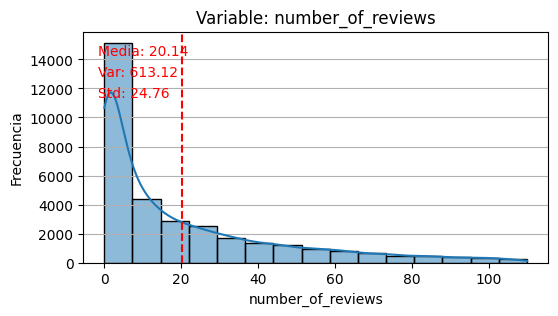

In [257]:

percentil_95 = df['number_of_reviews'].quantile(0.95)
df_filtrado = df[df['number_of_reviews'] <= percentil_95]

plot_histograma(df_filtrado, 'number_of_reviews')

### Caracteristicas del alojamiento

#### Distribucion de accomodates (cantidad de huespedes permitidos)

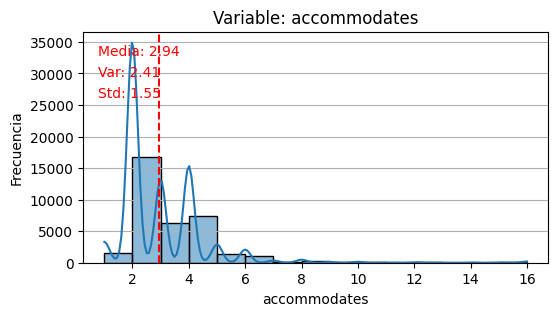

In [258]:
plot_histograma(df, 'accommodates')

#### Distribucion de beds (cantidad de camas)

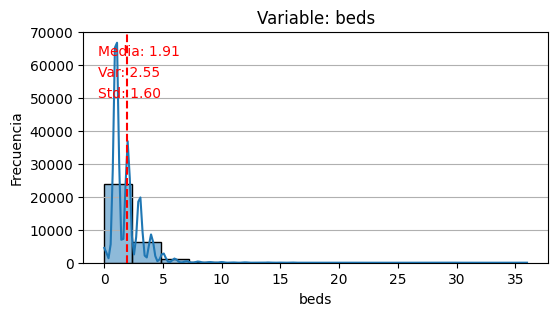

In [259]:
plot_histograma(df, 'beds')

Se puede observar que entre 0 y 5 camas es lo mas habitual, sin embargo es llamativo que haya casos donde un hospedaje tenga 10 o mas camas, por lo que vamos a mirar que tipo de hospedaje es y que tipo de habitacion 

In [260]:
beds_mayores_10 = df[df['beds'] >= 10]

agrupacion_beds_10 = beds_mayores_10.groupby(['room_type', 'property_type']).size().reset_index(name='frecuencia')
agrupacion_beds_10 = agrupacion_beds_10.sort_values(by='frecuencia', ascending=False)

agrupacion_beds_10


,room_type,property_type,frecuencia
4,Entire home/apt,Entire home,59
7,Entire home/apt,Entire rental unit,57
12,Private room,Private room in home,16
14,Private room,Private room in rental unit,4
9,Entire home/apt,Entire villa,4
2,Entire home/apt,Entire condo,4
11,Private room,Private room in bed and breakfast,3
8,Entire home/apt,Entire townhouse,3
6,Entire home/apt,Entire place,2
10,Hotel room,Room in bed and breakfast,2


Realizamos un nuevo grafico excluyendo los mayores al percentil 95 para obtener una mejor visualizacion

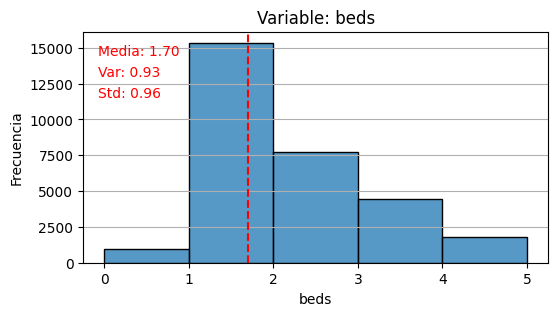

In [261]:
percentil_95 = df['beds'].quantile(0.95)
df_filtrado = df[df['beds'] <= percentil_95]
bins = range(int(df_filtrado['beds'].min()), int(df_filtrado['beds'].max()) + 2) # Esto se realiza para que el histograma muestre solo valores enteros (ya que no existe el concepto de media cama)

plot_histograma(df_filtrado, 'beds',bins=bins, kde=False)

### Distribucion de los campos de disponibilidad

#### availability_365 (indica cuantos dias en el año disponible para alquilar)

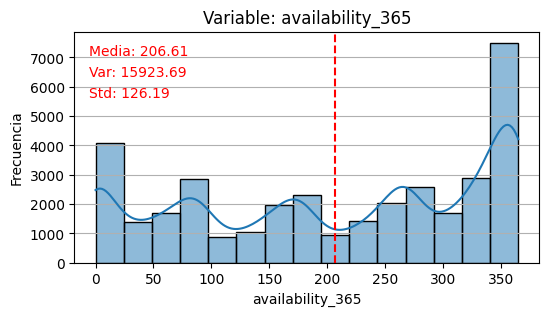

In [262]:
plot_histograma(df, 'availability_365')

#### availability_90 (antidad de días que el alojamiento está disponible en los próximos 90 días)

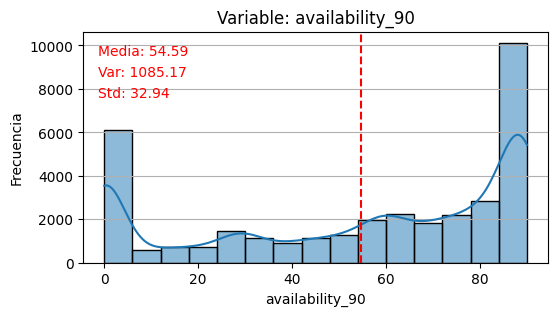

In [263]:
plot_histograma(df, 'availability_90')

#### availability_60 (antidad de días que el alojamiento está disponible en los próximos 60 días)

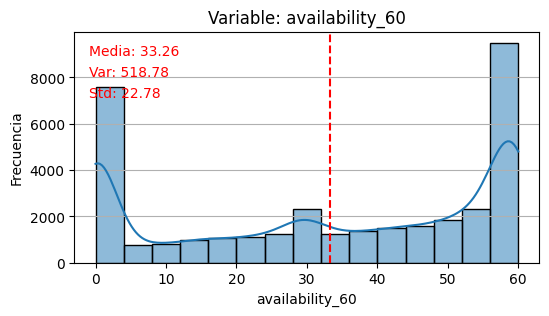

In [264]:
plot_histograma(df, 'availability_60')

#### availability_30 (antidad de días que el alojamiento está disponible en los próximos 30 días)

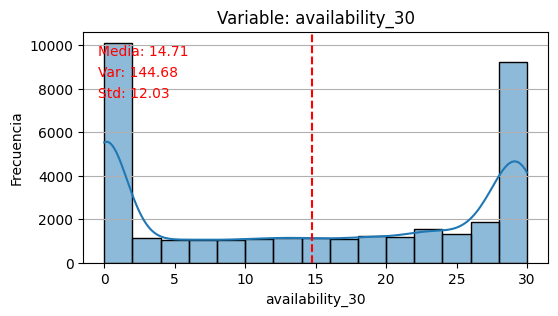

In [265]:
plot_histograma(df, 'availability_30')

Al observar los histogramas de disponibilidad, se aprecia una tendencia clara a configurar la disponibilidad en bloques mensuales, con picos marcados en 30, 60, 90 días, entre otros.

### Realizamos una matriz de correlacion sobre un subset de campos para observar la relacion entre las columnas

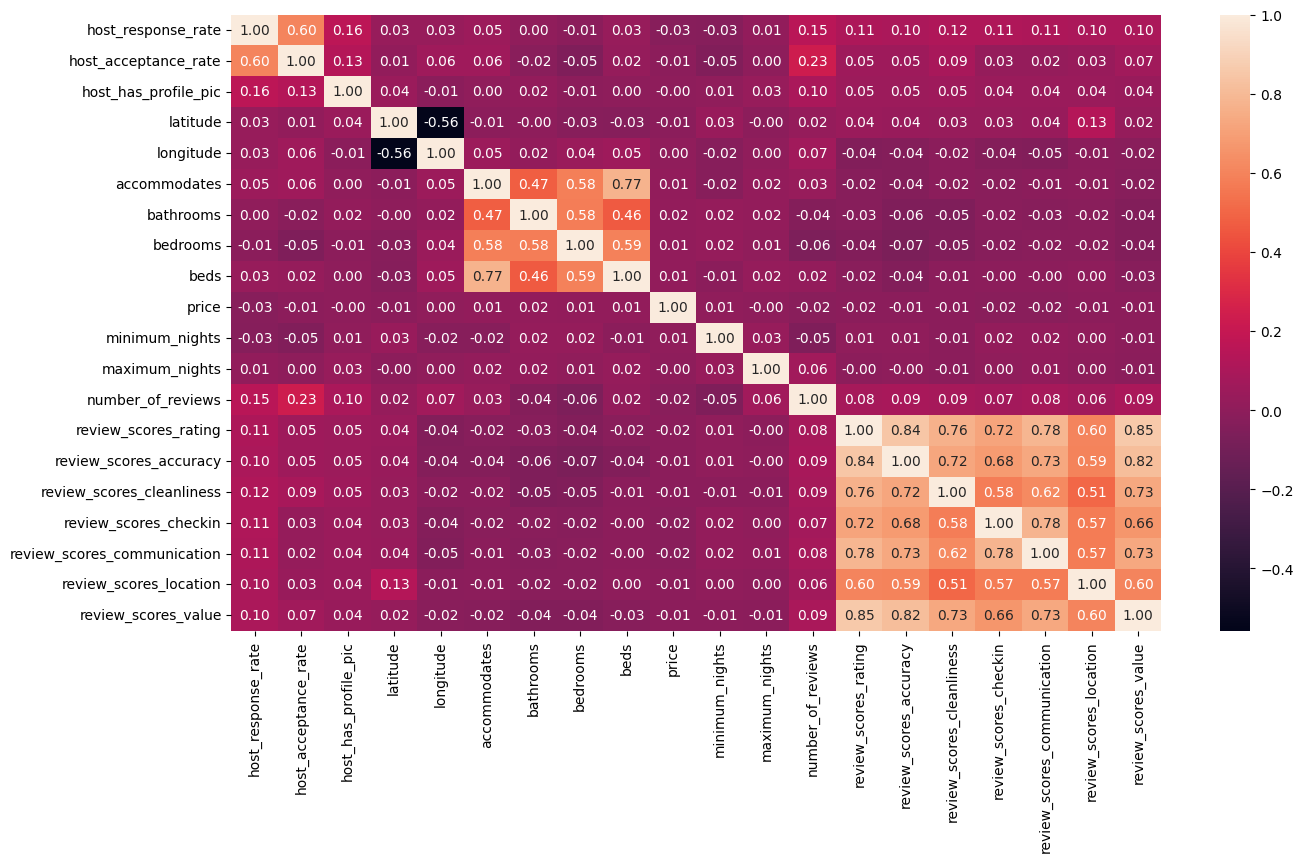

In [266]:
subset_columnas = ['host_response_rate','host_acceptance_rate','host_has_profile_pic','latitude','longitude','accommodates','bathrooms','bedrooms',
            'beds','price','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
            'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']


sub_df = df[subset_columnas]

correlacion_matrix = sub_df.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlacion_matrix, annot=True, cmap='rocket', annot_kws={"size": 10}, fmt=".2f", cbar=True)
plt.show()

Vemos, a primera vista, que los mayores índices de correlación se ven reflejados en datos del inmueble pertenecientes a sectores similares. Ejemplos:
- tasa de respuesta y tasa de aceptación del host
- Características del inmueble (ambientes, cuartos. camas y baños)
- Puntajes de califiación del inmueble (general, limpieza, checkin, communicación, locación)

### Revisamos si tenemos filas que tengan mas del 60% de columnas nulas

In [267]:
threshold = 0.6* df.shape[1]
# Filtrar las filas que tienen más del 80% de NaN
filas_mayoria_nulas = df[df.isnull().sum(axis=1) > threshold]
print(f"Cantidad de columnas con mas del 60% de columnas nulas {len(filas_mayoria_nulas)}")

Cantidad de columnas con mas del 60% de columnas nulas 0


## Analisis de nulos

Revisamos la correlacion de datos nulos entre un subset de campos

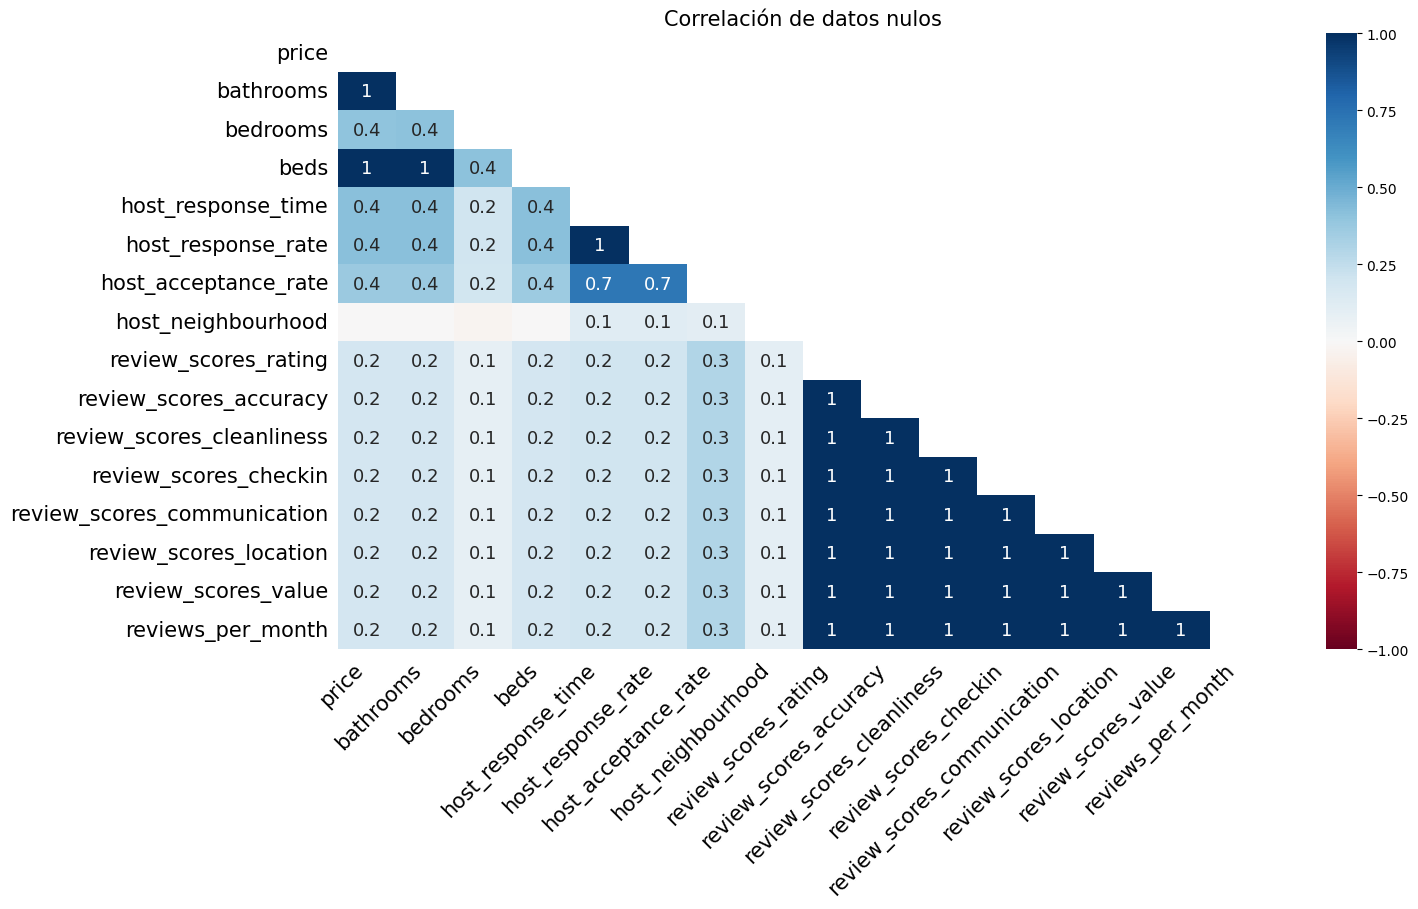

In [186]:
msno.heatmap(df[[ 'price','bathrooms','bedrooms','beds','amenities','host_response_time', 
                 'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood',
                'review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                'review_scores_checkin','review_scores_communication','review_scores_location',
                'review_scores_value','instant_bookable','reviews_per_month']], 
                fontsize=15, figsize=(15,8))
plt.title("Correlación de datos nulos", fontsize=15)
plt.show()

Notamos que las variables que tienen mayor correlación al ser nulas son:
- Taza de respuesta y aceptación del propietario.
- Puntajes de calificación del inmueble. En este caso se puede ver que al momento de calificar se tienen que hacer sobre todas las categorias, caso contrario no hay ninguna calificacion del usuario
- Precio, camas y baños tienen correlacion de 1. Esto puede indicar que son hospedajes que estan cargados en el sistema de forma incompleta y que pueden no ser validos para alquilar


In [187]:
# Creamos una función para calcular el porcentaje de nulos en una columna, agrupando por una o más columnas
def nulos_por_grupo(df, grupo_cols, target_col):
    agrupar_nulos = (
        df.groupby(grupo_cols, observed=True)[target_col]
        .apply(lambda x: x.isnull().mean() * 100)
        .reset_index(name=f'porcentaje_nulos_{target_col}')
    )
    return agrupar_nulos

In [188]:
nulos_price_por_room_type = nulos_por_grupo(df, 'room_type', 'price')
# 2. Calcular cantidad de muestras por property_type
conteo_room_type = df['room_type'].value_counts(dropna=False).reset_index()
conteo_room_type.columns = ['room_type', 'cantidad_muestras']  # Asignar nombres correctos

# 3. Calcular porcentaje sobre total
total = len(df)
conteo_room_type['porcentaje_sobre_total'] = 100 * conteo_room_type['cantidad_muestras'] / total

# 4. Unir con el resultado de tu función
resultado_room_type = nulos_price_por_room_type.merge(conteo_room_type, on='room_type')
resultado_room_type

,room_type,porcentaje_nulos_price,cantidad_muestras,porcentaje_sobre_total
0,Entire home/apt,9.484774,32083,91.217446
1,Hotel room,29.508197,61,0.173433
2,Private room,17.491409,2910,8.273627
3,Shared room,3.389831,118,0.335494


Aca podemos ver que en el caso de Hotel room del cual tenemos pocas muestras, hay un alto porcentaje de nulos, lo cual es a considerar su utilidad a futuro

In [189]:
nulos_price_por_property_type = nulos_por_grupo(df, 'property_type', 'price')

# 2. Calcular cantidad de muestras por property_type
conteo = df['property_type'].value_counts(dropna=False).reset_index()
conteo.columns = ['property_type', 'cantidad_muestras']  # Asignar nombres correctos

# 3. Calcular porcentaje sobre total
total = len(df)
conteo['porcentaje_sobre_total'] = 100 * conteo['cantidad_muestras'] / total

# 4. Unir con el resultado de tu función
resultado = nulos_price_por_property_type.merge(conteo, on='property_type')
resultado

,property_type,porcentaje_nulos_price,cantidad_muestras,porcentaje_sobre_total
0,Bus,0.000000,1,0.002843
1,Camper/RV,20.000000,5,0.014216
2,Casa particular,21.951220,41,0.116570
3,Castle,0.000000,2,0.005686
4,Cave,0.000000,1,0.002843
5,Entire bungalow,0.000000,1,0.002843
6,Entire cabin,20.000000,5,0.014216
7,Entire chalet,16.666667,6,0.017059
8,Entire condo,8.925620,3630,10.320710
9,Entire cottage,0.000000,1,0.002843


Podemos observar que los casos con precio nulo se concentran en tipos de propiedad poco frecuentes dentro del dataset. Dado que representan una proporción muy baja del total, puede resultar util excluirlos para mejorar la calidad del análisis por tipo de hospedaje

## Tratamiento de valores nulos

Verificamos si los nulos de has_availavility los podemos poner en 0 en el caso de que las otras columnas sobre disponibilidad tambien son 0

In [190]:
availability_nulos = df['has_availability'].isnull()

# De esas filas, verificar cuántas tienen todas las disponibilidades en 0
cond_all_zero = (
    (df['availability_30'] == 0) &
    (df['availability_60'] == 0) &
    (df['availability_90'] == 0) &
    (df['availability_365'] == 0)
)

nulos_con_dispo_cero = df[availability_nulos & cond_all_zero].shape[0]

total_nulos = df[availability_nulos].shape[0]

print(f"Total has_availability nulos: {total_nulos}")
print(f"De esos, cuántos tienen disponibilidad 0 en todos los campos: {nulos_con_dispo_cero}")

Total has_availability nulos: 1167
De esos, cuántos tienen disponibilidad 0 en todos los campos: 849


In [191]:
# Completamos estos 849 con 0

df.loc[(df['has_availability'].isnull() &(df['availability_30'] == 0) &(df['availability_60'] == 0) &(df['availability_90'] == 0) &(df['availability_365'] == 0)), 'has_availability'] = 0
availability_nulos = df['has_availability'].isnull()
total_nulos = df[availability_nulos].shape[0]
print(f"Total has_availability nulos luego del completado: {total_nulos}")

Total has_availability nulos luego del completado: 318


Ahora consideremos que si alguno de los campos availability tiene un valor, entonces significa que tiene disponibilidad y has_availability deberia ser true. Miramos cuando casos de estos tenemos donde has_availability es nulo

In [192]:
cond = (
    (df['availability_30'] > 0) |
    (df['availability_60'] > 0) |
    (df['availability_90'] > 0) |
    (df['availability_365'] > 0)
)

nulos_con_dispo = df[availability_nulos & cond].shape[0]

print(f"Total has_availability nulos: {total_nulos}")
print(f"De esos, cuántos tienen disponibilidad en alguno de sus campos: {nulos_con_dispo}")

Total has_availability nulos: 318
De esos, cuántos tienen disponibilidad en alguno de sus campos: 318


In [193]:
df.loc[df['has_availability'].isnull() & cond, 'has_availability'] = 1
availability_nulos = df['has_availability'].isnull()
total_nulos = df[availability_nulos].shape[0]
print(f"Total has_availability nulos luego del completado: {total_nulos}")

Total has_availability nulos luego del completado: 0


### Verificamos si los nulos en los campos referidos a reviews son porque la cantidad de reviews (posiblemente nunca alquilados) es 0

In [194]:
sin_reviews = df['number_of_reviews'] == 0
campos_reviews = [col for col in df.columns if 'review' in col]
porcentajes_nulos = {
    col: df[sin_reviews][col].isnull().mean() * 100
    for col in campos_reviews
}

porcentajes_df = pd.DataFrame.from_dict(porcentajes_nulos, orient='index', columns=['% de nulos'])
porcentajes_df = porcentajes_df.sort_values(by='% de nulos', ascending=False)
porcentajes_df


,% de nulos
first_review,100.0
last_review,100.0
review_scores_checkin,100.0
review_scores_cleanliness,100.0
review_scores_accuracy,100.0
review_scores_rating,100.0
review_scores_communication,100.0
review_scores_location,100.0
review_scores_value,100.0
reviews_per_month,100.0


Se puede ver que cuando la cantidad de reviews es 0 los campos relacionados a reviews son nulos. Por el momento no se ha tomado una decision sobre como tratar estos nulos, ya que va a depender del uso que se le vaya a dar

Creamos una columna has_review que va a indicar si el hospedaje tiene o no alguna review

In [195]:
df['has_review'] = (df['number_of_reviews'] > 0).astype(int)

## Detección de Outliers y tratamiento de outliers

#### Basado en el rango intercuartil

Generamos un df secundario con las columnas numericas del dataset

In [196]:
df_numbers=df[['price', 
               'accommodates',	
               'bathrooms',
               'bedrooms',	
               'beds',
               'minimum_nights'	,
               'maximum_nights'	,
               'minimum_minimum_nights'	,
               'maximum_minimum_nights'	,
               'minimum_maximum_nights'	,
               'maximum_maximum_nights'	,
               'minimum_nights_avg_ntm'	,
               'maximum_nights_avg_ntm',	
               'availability_30'	,
               'availability_60'	,
               'availability_90'	,
               'availability_365'	,	
               'number_of_reviews'	,
               'number_of_reviews_ltm'	,
               'number_of_reviews_l30d',	
               'availability_eoy'	,
               'number_of_reviews_ly'	,
               'estimated_occupancy_l365d',	
               'estimated_revenue_l365d']]
df_numbers.dtypes

price                        float64
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
minimum_nights                 int64
maximum_nights                 int64
minimum_minimum_nights         int64
maximum_minimum_nights         int64
minimum_maximum_nights         int64
maximum_maximum_nights         int64
minimum_nights_avg_ntm       float64
maximum_nights_avg_ntm       float64
availability_30                int64
availability_60                int64
availability_90                int64
availability_365               int64
number_of_reviews              int64
number_of_reviews_ltm          int64
number_of_reviews_l30d         int64
availability_eoy               int64
number_of_reviews_ly           int64
estimated_occupancy_l365d      int64
estimated_revenue_l365d      float64
dtype: object

In [269]:
Q1 = df_numbers.quantile(0.25)
Q3 = df_numbers.quantile(0.75)

IQR = Q3 - Q1
outliers_iqr = ( df_numbers < (Q1 - 1.5 * IQR)) | ( df_numbers > (Q3 + 1.5 * IQR))
print(f"Outliers\nPrice: <{Q1['price'] - 1.5 * IQR['price']:.02f} o >{Q3['price'] + 1.5 * IQR['price']:.02f}")

Outliers
Price: <-12365.50 o >99838.50


#### Observamos los outliers de la columna price

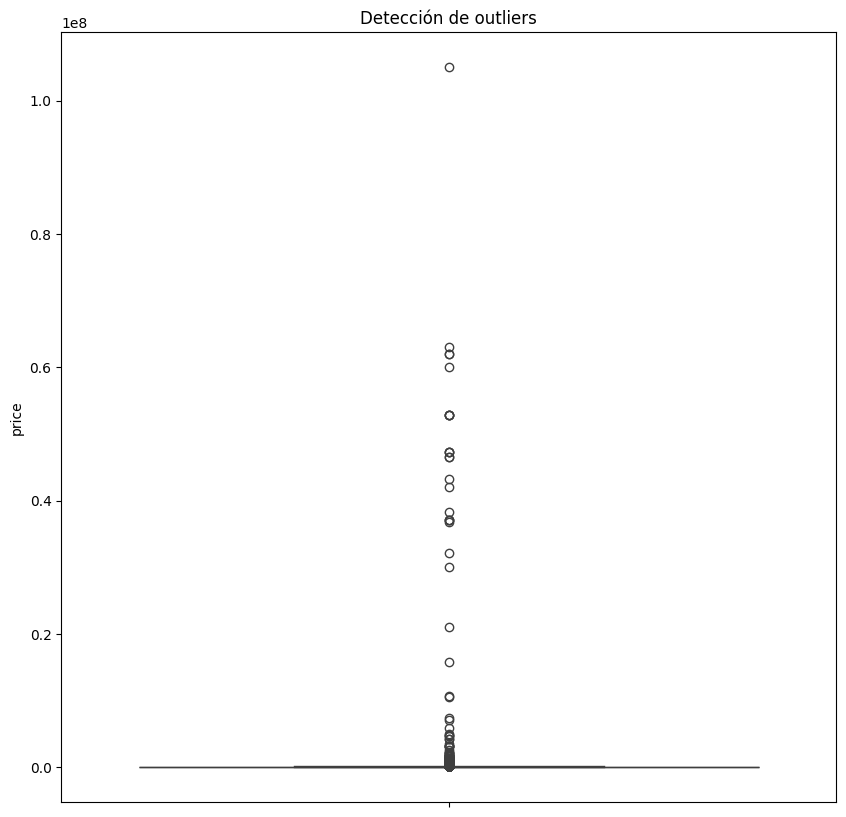

In [270]:
# Visualización de outliers con boxplots
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_numbers['price'])
plt.title("Detección de outliers")
plt.show()

Notamos que el gráfico genera una gran dispersión por datos excesivamente altos en el precio. Realizamos el mismo grafico pero dejando afuera los outliers extremos para ver si mejora el grafico

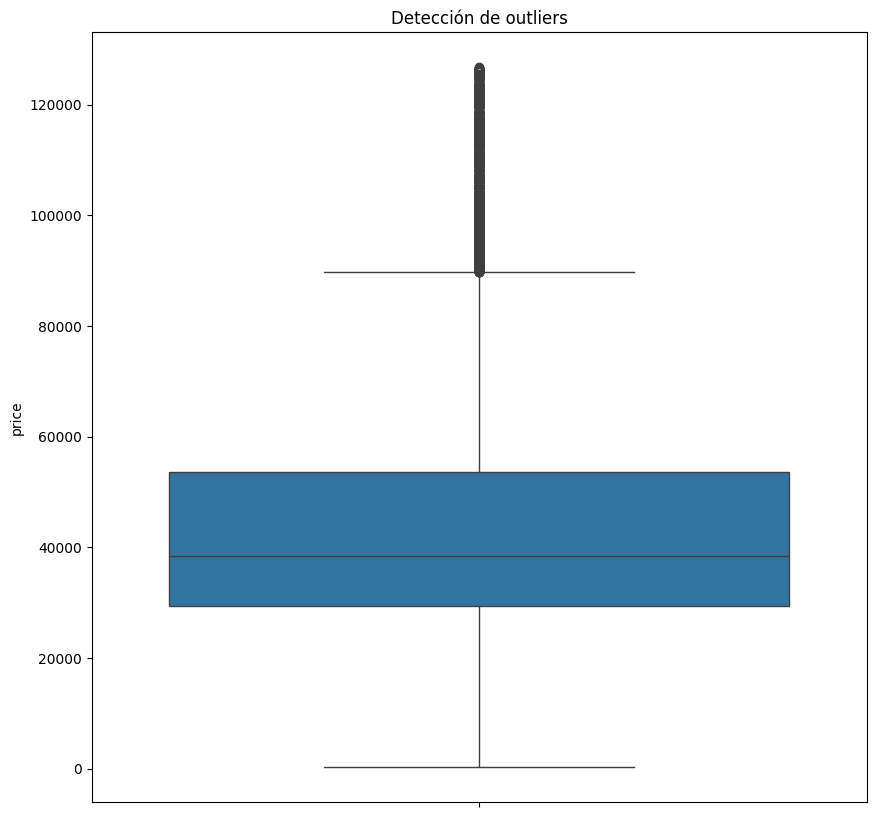

In [271]:
price_threshold = df['price'].quantile(0.95)
df_numbers_filtrado = df_numbers[df['price'] <= price_threshold]
# Visualización de outliers con boxplots
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_numbers_filtrado['price'])
plt.title("Detección de outliers")
plt.show()

In [272]:
df_ouliers_price = df_numbers[df['price'] <= price_threshold]
print(f"La cantidad de outliers extremos para la columna price son: {df_ouliers_price.shape[1]}")
print("Estas muestras son candidatas a eliminar ya que ponen mucho ruido en los graficos")

La cantidad de outliers extremos para la columna price son: 24
Estas muestras son candidatas a eliminar ya que ponen mucho ruido en los graficos


#### Realizamos un analisis extra con sobre los outliers de price

In [273]:
# Método basado en desviación estándar
mean = df_numbers.mean()
#std = df.std()
std = df_numbers.apply(lambda x: np.nanstd(x, ddof=1))

outliers_std = (df_numbers < (mean - 3 * std)) | (df_numbers > (mean + 3 * std))

print(f"Outliers\nPrice: <{mean['price'] - 3 * std['price']:.02f} o >{mean['price'] + 3 * std['price']:.02f}")


Outliers
Price: <-4112481.49 o >4303457.01


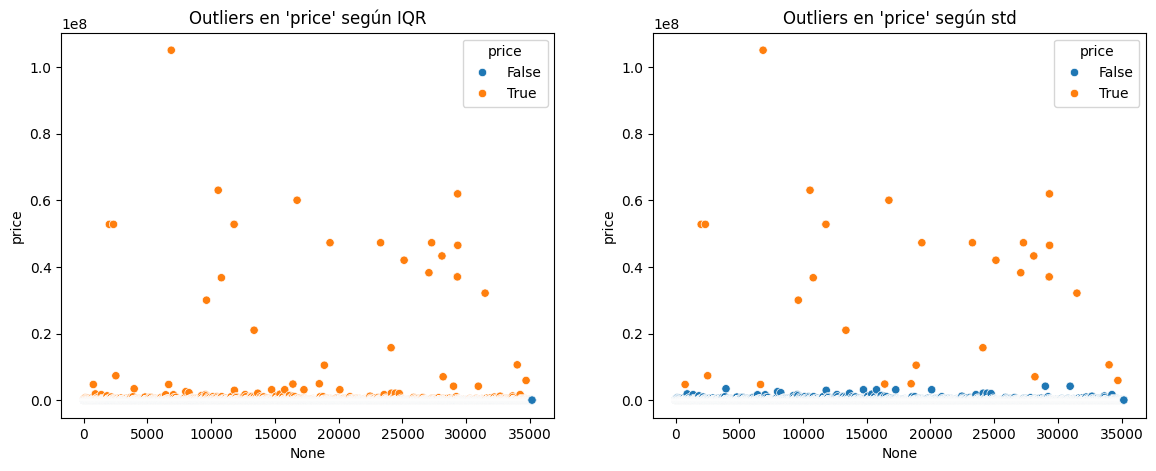

In [274]:
# Visualización con scatterplot
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(x=df.index, y=df['price'], hue=outliers_iqr['price'], ax=ax[0])
ax[0].set_title("Outliers en 'price' según IQR")
sns.scatterplot(x=df.index, y=df['price'], hue=outliers_std['price'], ax=ax[1])
ax[1].set_title("Outliers en 'price' según std")
plt.show()

Al igual que en el grafico de boxplot realizado anteriormente, podemos ver que los valores que estan por encima del intercualtil 95 generan mucha dispersion. Vamos a realizar el mismo grafico sin incluir estos

In [275]:
price_threshold = df['price'].quantile(0.95)
df_numbers_filtrado = df_numbers[df['price'] <= price_threshold]

# Método basado en desviación estándar
mean = df_numbers_filtrado.mean()
#std = df.std()
std = df_numbers_filtrado.apply(lambda x: np.nanstd(x, ddof=1))

outliers_std = (df_numbers_filtrado < (mean - 3 * std)) | (df_numbers_filtrado > (mean + 3 * std))

print(f"Outliers\nPrice: <{mean['price'] - 3 * std['price']:.02f} o >{mean['price'] + 3 * std['price']:.02f}")

Outliers
Price: <-22872.09 o >112347.76


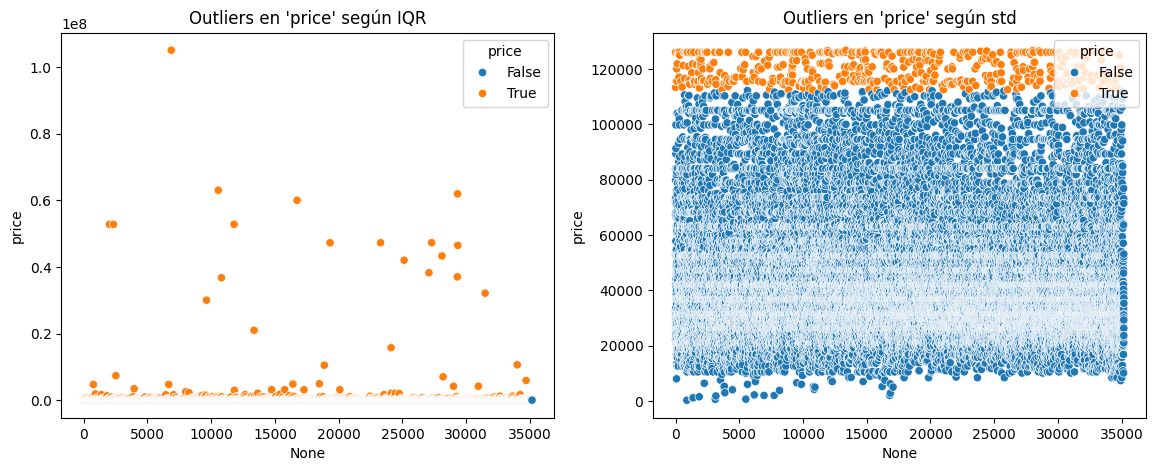

In [276]:
# Visualización con scatterplot
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(x=df.index, y=df['price'], hue=outliers_iqr['price'], ax=ax[0])
ax[0].set_title("Outliers en 'price' según IQR")
sns.scatterplot(x=df.index, y=df['price'], hue=outliers_std['price'], ax=ax[1])
ax[1].set_title("Outliers en 'price' según std")
plt.show()

Dado lo visto en ambos graficos y que estos valores extremos representan un pequeña proporcion del total, decidimos eliminarlos

In [277]:
price_threshold = df['price'].quantile(0.95)
df = df[df['price'] <= price_threshold].copy()

#### Outliers de la columna minimum_nights

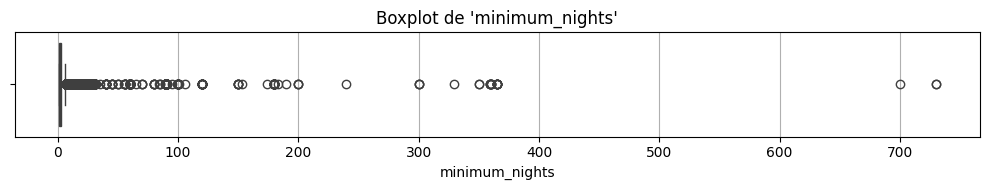

In [278]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['minimum_nights'])
plt.title("Boxplot de 'minimum_nights'")
plt.xlabel("minimum_nights")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

Los outliers en minimum_nights reflejan un comportamiento atípico. Esta variable indica la cantidad mínima de noches requeridas para realizar una reserva. Valores superiores a 300 noches podrían deberse a errores en la carga de datos o a un tipo de alquiler de largo plazo, que escapa al uso típico de la plataforma, enfocada en estadías temporarias.

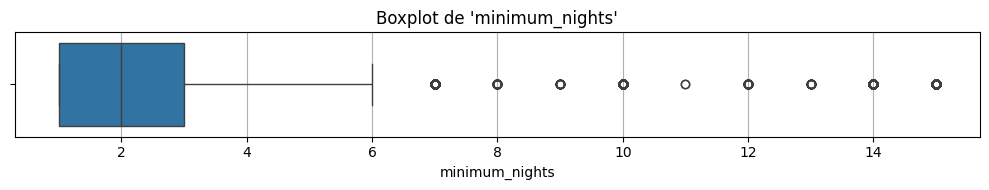

In [279]:
mmn_threshold = df['minimum_nights'].quantile(0.95)
df_mmn = df[df['minimum_nights'] <= mmn_threshold]

plt.figure(figsize=(10, 2))
sns.boxplot(x=df_mmn['minimum_nights'])
plt.title("Boxplot de 'minimum_nights'")
plt.xlabel("minimum_nights")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

Al excluir los outliers extremos, el boxplot muestra que la mayoría de los hospedajes requieren una estadía mínima de entre 1 y 3 noches, lo que refleja el uso predominante de la plataforma para alquileres temporarios de corta duración.

#### Outliers de estimated_revenue_l365d (indica el ingreso estimado esperando durante el año en funcion del precio y la disponibilidad)

In [280]:

q1 = df['estimated_revenue_l365d'].quantile(0.25)
q3 = df['estimated_revenue_l365d'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_revenue = df[(df['estimated_revenue_l365d'] < lower_bound) | (df['estimated_revenue_l365d'] > upper_bound)]

outliers_revenue.shape, outliers_revenue['estimated_revenue_l365d'].sort_values(ascending=False).head(10)

((1688, 60),
 2477     32136630.0
 22581    32136630.0
 18439    32136630.0
 9563     32136630.0
 12602    32136630.0
 9880     32136630.0
 18621    31448385.0
 19122    31370610.0
 18274    31234185.0
 20129    31212765.0
 Name: estimated_revenue_l365d, dtype: float64)

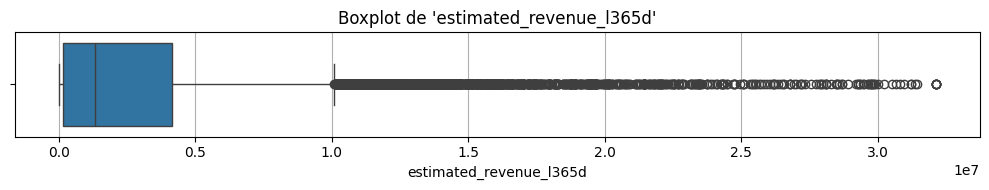

In [281]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['estimated_revenue_l365d'])
plt.title("Boxplot de 'estimated_revenue_l365d'")
plt.xlabel("estimated_revenue_l365d")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

## Principales Inquietudes planteadas del dataset

Por ultimo, luego de realizar algunos tratamientos sobre los nulos y los outliers, hacemos algunos analisis extra sobre los datos

### Precio de las propiedades por tipo de alojamiento

Para tipos de alojamiento podemos considerar dos campos:
* room_type: indica el tipo de habitacion
* property_type : indica el tipo de propiedad

observemos como se agrupan los mismos

In [282]:
agrupacion = df.groupby(['room_type', 'property_type']).size().reset_index(name='frecuencia')

# Ordenar por room_type y frecuencia descendente
agrupacion = agrupacion.sort_values(by=['room_type', 'frecuencia'], ascending=[True, False])
agrupacion

,room_type,property_type,frecuencia
15,Entire home/apt,Entire rental unit,22117
7,Entire home/apt,Entire condo,3125
16,Entire home/apt,Entire serviced apartment,963
13,Entire home/apt,Entire loft,644
11,Entire home/apt,Entire home,288
18,Entire home/apt,Entire vacation home,225
17,Entire home/apt,Entire townhouse,34
21,Entire home/apt,Room in aparthotel,34
2,Entire home/apt,Casa particular,28
10,Entire home/apt,Entire guesthouse,23


Se observa que Hotel room presenta la mediana de precios más alta(teniendo en ccuenta que hay pocas muestras). Esto podría deberse a que los hoteles están ubicados en zonas más costosas de la Ciudad de Buenos Aires o a que se trata de establecimientos de mayor exclusividad. En cuanto al resto de las categorías, el orden de precios sigue una lógica esperada: Entire home/apt es más costoso que Private room, y este a su vez más que Shared room

#### Observamos como son los precios segun room_type

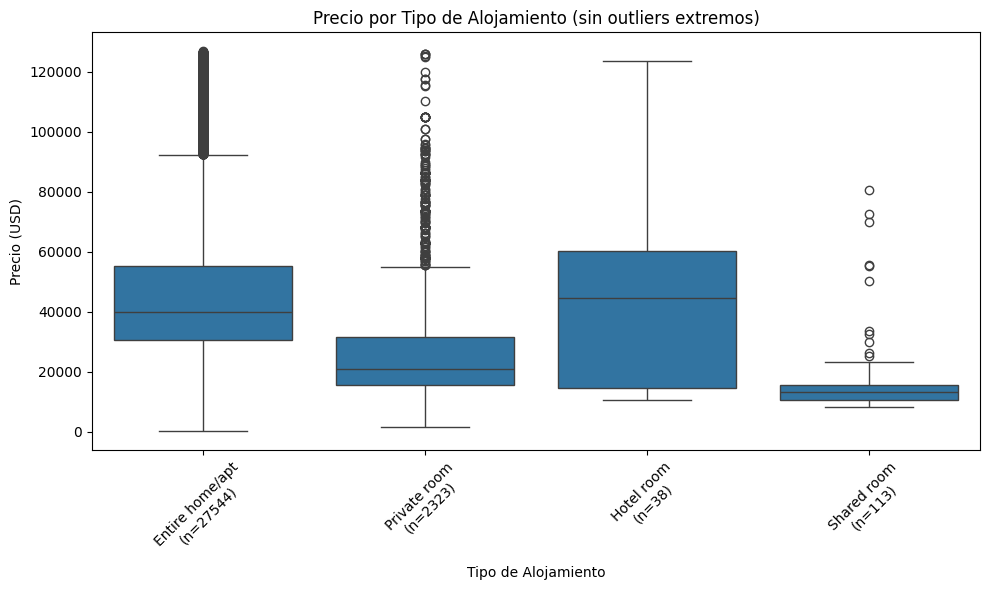

In [283]:
# Calcular cantidad de muestras por room_type
counts = df['room_type'].value_counts()

labels_con_n = [f"{tipo}\n(n={counts[tipo]})" for tipo in df['room_type'].unique()]

# Graficar
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Precio por Tipo de Alojamiento (sin outliers extremos)')
plt.ylabel('Precio (USD)')
plt.xlabel('Tipo de Alojamiento')
plt.xticks(ticks=range(len(labels_con_n)), labels=labels_con_n, rotation=45)
plt.tight_layout()
plt.show()

In [284]:
precio_room_type = df.groupby('room_type')['price'].median().sort_values(ascending=False)
precio_room_type

room_type
Hotel room         44634.0
Entire home/apt    39908.0
Private room       21004.0
Shared room        13200.0
Name: price, dtype: float64

Se puede observar que Hotel room tiene la media de precios mas alta, aunque hay que tener en cuenta que hay pocas muestras. Esto puede indicar que los hoteles se encuentren en los lugares mas caros de la ciudad de buenos aires o sean hoteles muy exclusivos.
El orden de precios de los otros tipos sigue una logica esperada

#### Observamos como varia el precio por tipo de propiedad mostrando de forma agrupada por room_type

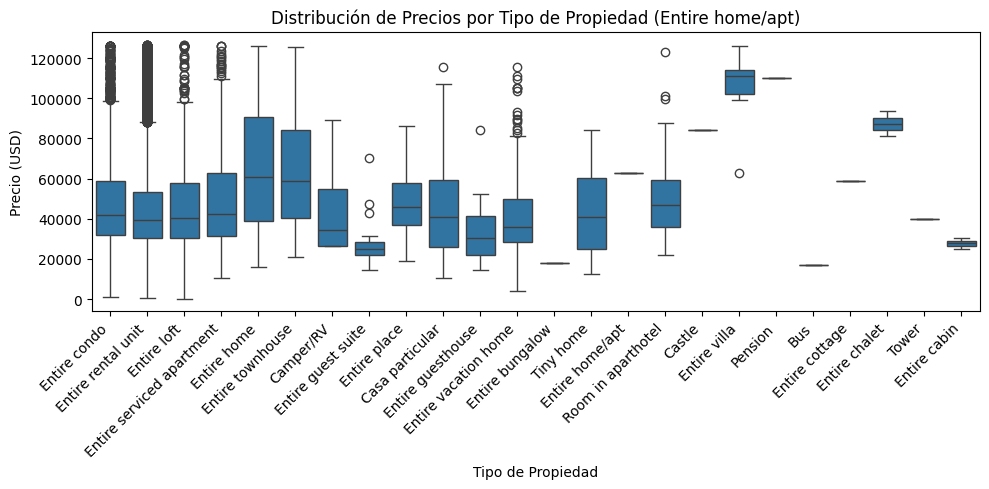

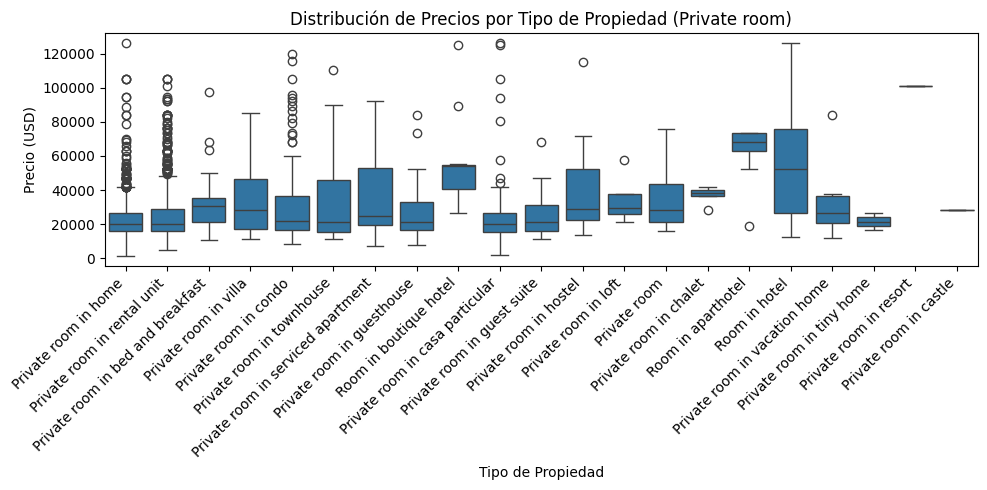

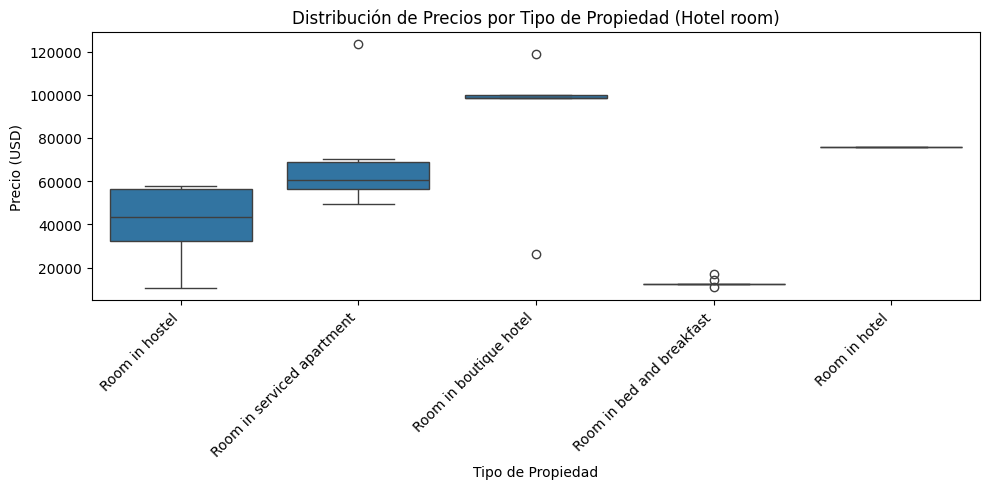

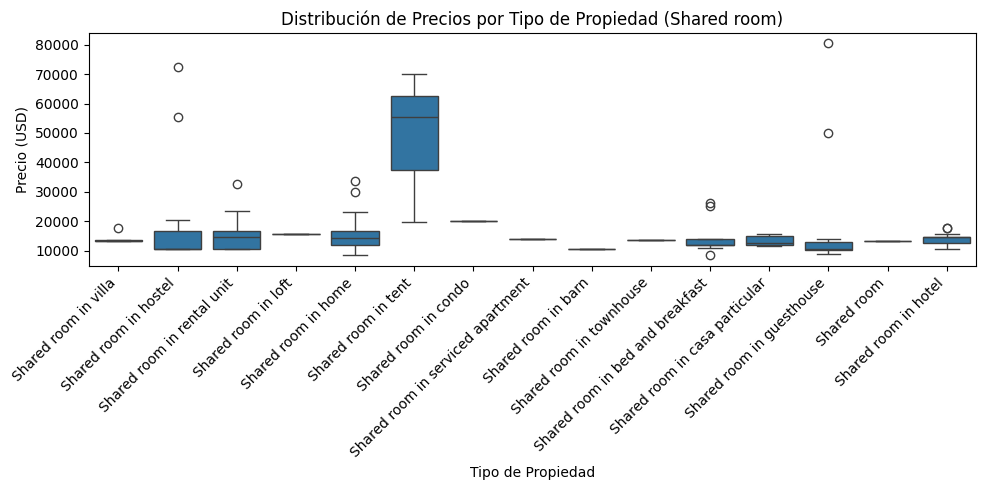

In [285]:
room_types = df['room_type'].unique()

# Crear una figura por cada tipo de room_type
for room in room_types:
    plt.figure(figsize=(10, 5))
    subset = df[df['room_type'] == room]
    sns.boxplot(data=subset, x='property_type', y='price')
    plt.title(f'Distribución de Precios por Tipo de Propiedad ({room})')
    plt.xlabel('Tipo de Propiedad')
    plt.ylabel('Precio (USD)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Patrones de Precios según ubicación del Inmueble

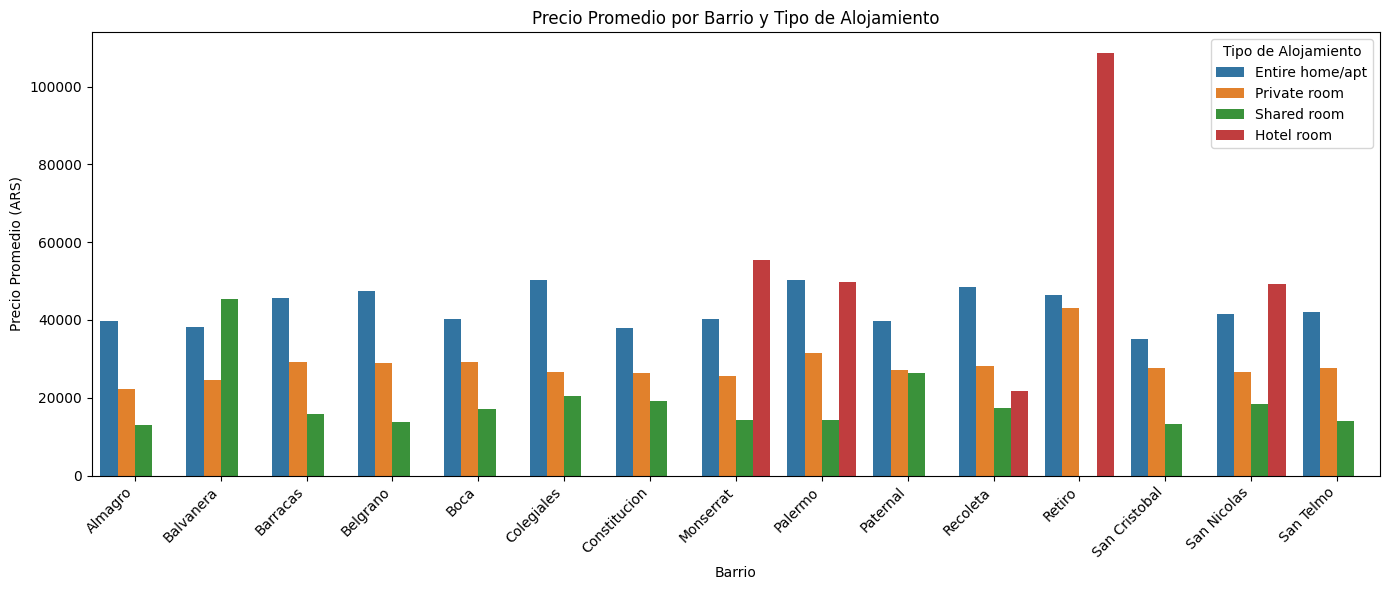

In [287]:


grupo = df.groupby(['neighbourhood_cleansed', 'room_type'])['price'].mean().reset_index()

# Elegimos los barrios con más datos (top 10 por cantidad de alojamientos)
top_barrios = grupo['neighbourhood_cleansed'].value_counts().head(15).index
grupo_filtrado = grupo[grupo['neighbourhood_cleansed'].isin(top_barrios)]

# Graficar
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.barplot(data=grupo_filtrado, x='neighbourhood_cleansed', y='price', hue='room_type')
plt.title('Precio Promedio por Barrio y Tipo de Alojamiento')
plt.ylabel('Precio Promedio (ARS)')
plt.xlabel('Barrio')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Alojamiento')
plt.tight_layout()
plt.show()

En primer lugar, se destaca el precio promedio elevado en Hotel room en el barrio de Retiro, lo cual puede estar relacionado con alojamientos exclusivos como el Hotel Sheraton. A nivel general, los precios muestran una fuerte relación con la ubicación: barrios como Recoleta, Belgrano y Palermo presentan precios más altos, lo cual es consistente con su popularidad entre turistas y su oferta de servicios

### Correlación entre puntuación de huéspedes y columnas numéricas relevantes

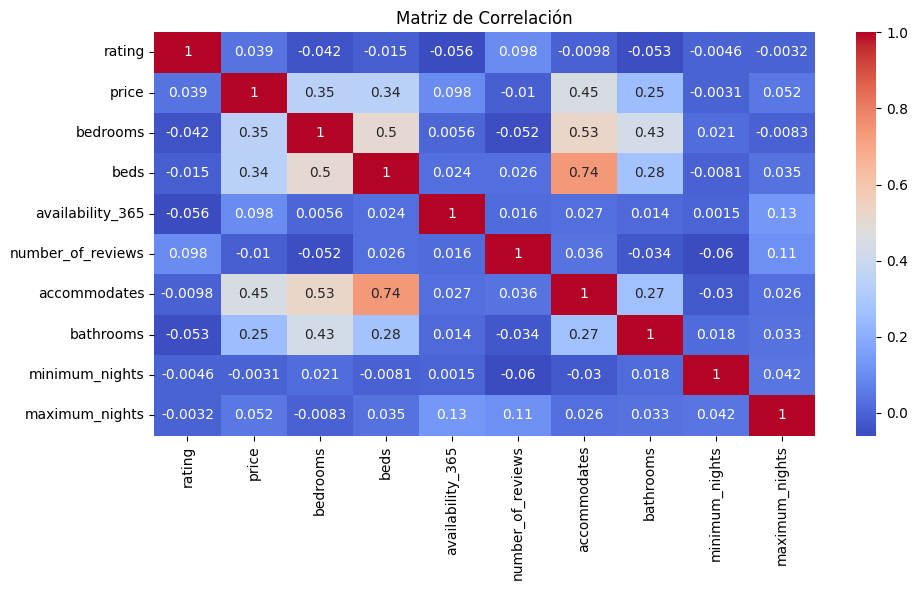

In [301]:
# Seleccionar columnas numéricas relevantes
columnas = ['rating', 'price', 'bedrooms', 'beds', 'availability_365', 'number_of_reviews', 'accommodates',
            'bathrooms','minimum_nights','maximum_nights']
df_corr = df[columnas].dropna()

# Calcular la matriz de correlación
correlacion = df_corr.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

En la matriz de correlación no se observan correlaciones altas entre el rating y características estructurales como la cantidad de camas, baños o habitaciones. Tampoco variables relacionadas con la administración del alojamiento, como el precio o la estadía mínima, parecen tener una relación significativa con la calificación de los huéspedes. Esto sugiere que los puntajes están influenciados más por la experiencia del usuario que por aspectos físicos del hospedaje.

### Distribución de rating según tipo de propiedad

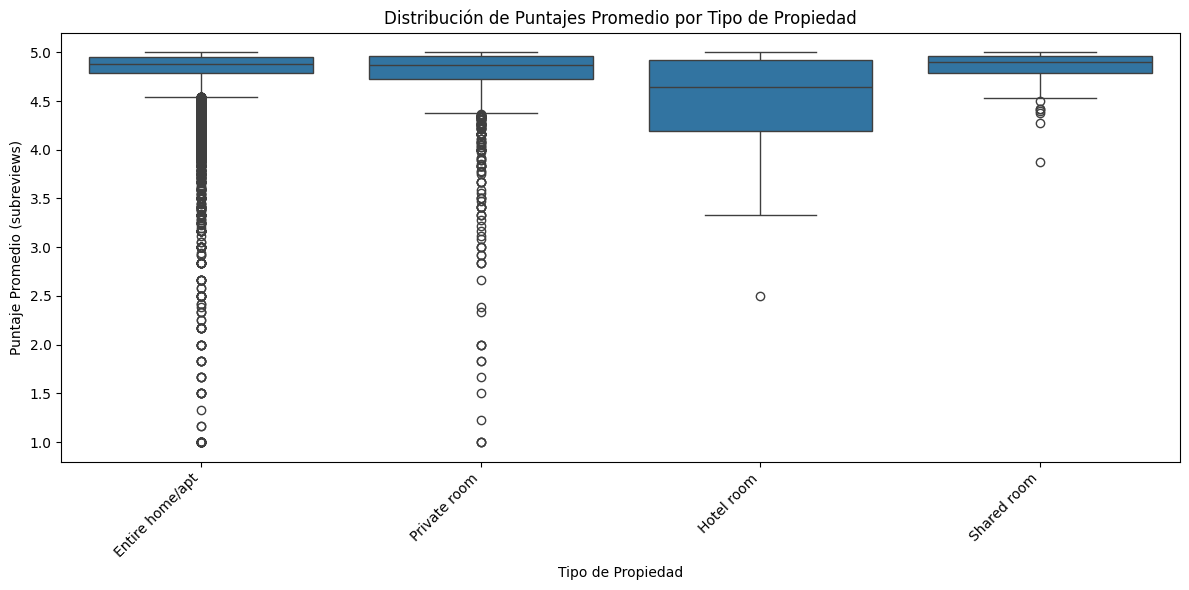

In [135]:
# Filtrar los tipos de propiedad más comunes para claridad (ej: top 10)
top_tipos = df['room_type'].value_counts().head(10).index
df_top = df[df['room_type'].isin(top_tipos)]

# Crear boxplot de puntuaciones
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='room_type', y='rating')
plt.title('Distribución de Puntajes Promedio por Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Puntaje Promedio (subreviews)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Distribución de reseñas según tipo de propiedad

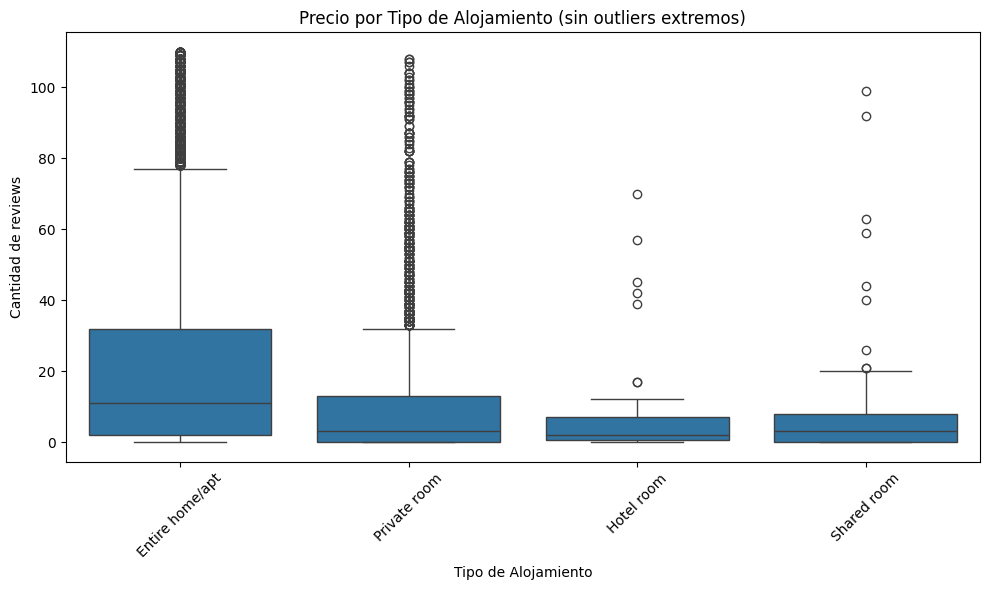

In [80]:
reviews_threshold = df['number_of_reviews'].quantile(0.95)
df_filtered = df[df['number_of_reviews'] <= reviews_threshold]
# Crear un boxplot con los precios filtrados
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='number_of_reviews', data=df_filtered)
plt.title('Precio por Tipo de Alojamiento (sin outliers extremos)')
plt.ylabel('Cantidad de reviews')
plt.xlabel('Tipo de Alojamiento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

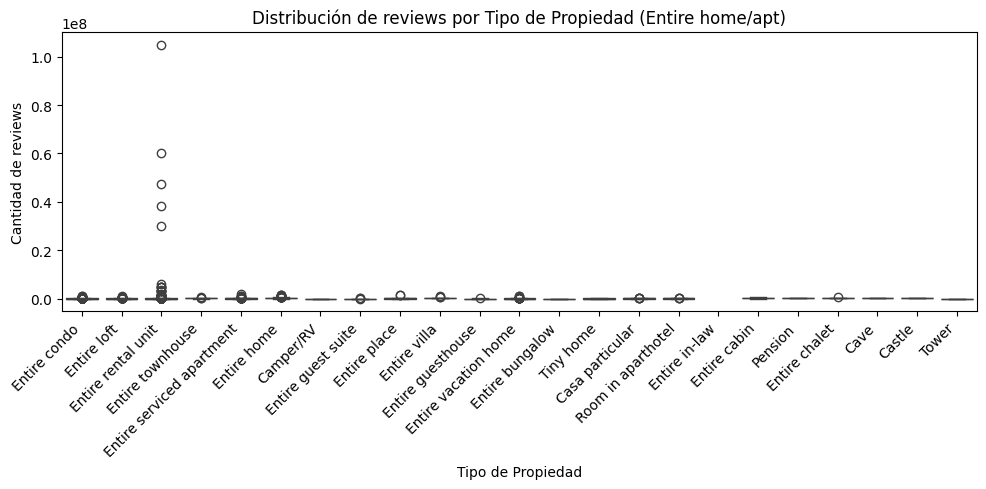

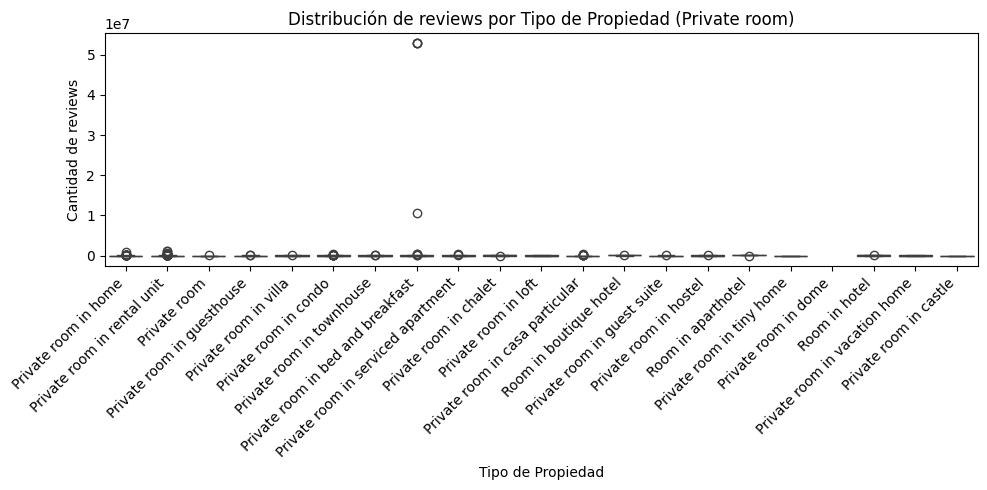

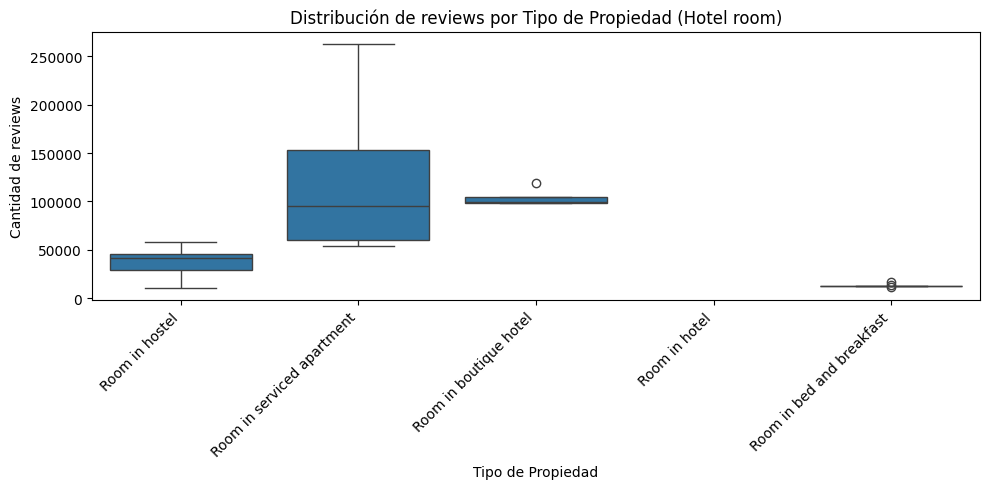

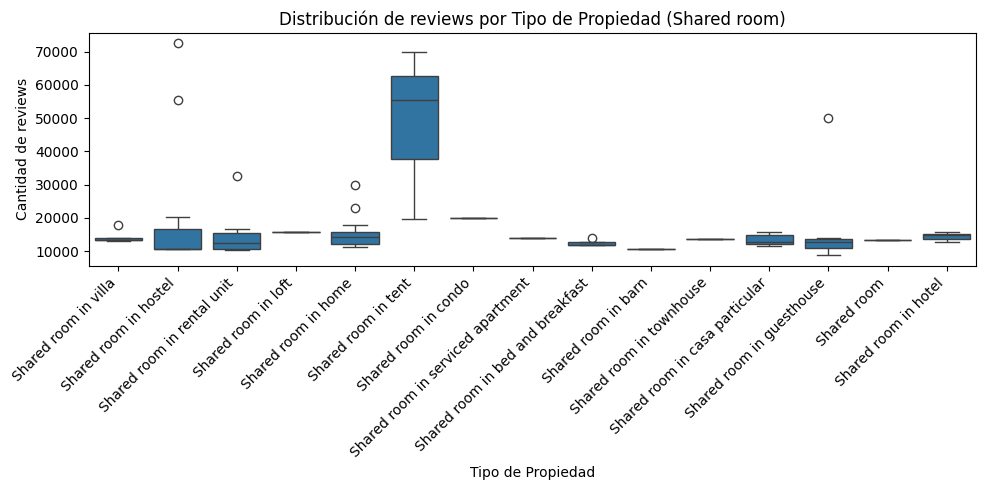

In [81]:
reviews_threshold = df['number_of_reviews'].quantile(0.95)
df_filtered = df[(df['number_of_reviews'] > 0) & (df['number_of_reviews'] <= reviews_threshold)]
room_types = df_filtered['room_type'].unique()

# Crear una figura por cada tipo de room_type
for room in room_types:
    plt.figure(figsize=(10, 5))
    subset = df_filtered[df_filtered['room_type'] == room]
    sns.boxplot(data=subset, x='property_type', y='price')
    plt.title(f'Distribución de reviews por Tipo de Propiedad ({room})')
    plt.xlabel('Tipo de Propiedad')
    plt.ylabel('Cantidad de reviews')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()